In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
city_file_to_load = 'Resources/city_data.csv'
ride_file_to_load = 'Resources/ride_data.csv'

city_data_df = pd.read_csv(city_file_to_load)
ride_data_df = pd.read_csv(ride_file_to_load)

In [3]:
city_data_df

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
...,...,...,...
115,Bradshawfurt,7,Rural
116,New Ryantown,2,Rural
117,Randallchester,9,Rural
118,Jessicaport,1,Rural


In [4]:
ride_data_df

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277


In [5]:
print(city_data_df.isnull().sum(),'\n=====\n')
print(ride_data_df.isnull().sum())

city            0
driver_count    0
type            0
dtype: int64 
=====

city       0
date       0
fare       0
ride_id    0
dtype: int64


In [6]:
print(city_data_df.dtypes,'\n=====\n')
print(ride_data_df.dtypes)

city            object
driver_count     int64
type            object
dtype: object 
=====

city        object
date        object
fare       float64
ride_id      int64
dtype: object


In [7]:
city_data_df['type'].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [8]:
print(f"There are {sum(city_data_df['type']=='Urban')} in Urban Cities,\n{sum(city_data_df['type']=='Suburban')} in Suburban neighborhoods,and \n{sum(city_data_df['type']=='Rural')} in towns")

There are 66 in Urban Cities,
36 in Suburban neighborhoods,and 
18 in towns


In [9]:
pyber_data_df = pd.merge(ride_data_df,city_data_df,how = 'left',on = ['city','city'])
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [10]:
urban_cities_df = pyber_data_df[pyber_data_df['type'] == 'Urban']
suburban_cities_df = pyber_data_df[pyber_data_df['type'] == 'Suburban']
rural_cities_df = pyber_data_df[pyber_data_df['type'] == 'Rural']

In [11]:
#x-axis total rides per city 

urban_ride_count = urban_cities_df.groupby(['city']).count()['ride_id']
suburban_ride_count = suburban_cities_df.groupby(['city']).count()['ride_id']
rural_ride_count = rural_cities_df.groupby(['city']).count()['ride_id']

urban_ride_count

city
Amandaburgh            18
Barajasview            22
Carriemouth            27
Christopherfurt        27
Deanville              19
                       ..
West Patrickchester    16
West Robert            31
West Samuelburgh       25
Williamsstad           23
Williamsview           20
Name: ride_id, Length: 66, dtype: int64

In [12]:
#y-axis Average Rides

urban_avg_fare = urban_cities_df.groupby(['city']).mean()['fare']
suburban_avg_fare = suburban_cities_df.groupby(['city']).mean()['fare']
rural_avg_fare = rural_cities_df.groupby(['city']).mean()['fare']

rural_avg_fare

city
Bradshawfurt         40.064000
Garzaport            24.123333
Harringtonfort       33.470000
Jessicaport          36.013333
Lake Jamie           34.358333
Lake Latoyabury      26.061818
Michaelberg          34.997500
New Ryantown         43.278333
Newtonview           36.745000
North Holly          29.130000
North Jaime          30.802500
Penaborough          35.246000
Randallchester       29.742000
South Jennifer       35.264286
South Marychester    41.870000
South Saramouth      36.160000
Taylorhaven          42.263333
West Heather         33.890000
Name: fare, dtype: float64

In [13]:
#Area of datapoint
urban_driver_count = urban_cities_df.groupby(['city']).mean()['driver_count']
suburban_driver_count = suburban_cities_df.groupby(['city']).mean()['driver_count']
rural_driver_count = rural_cities_df.groupby(['city']).mean()['driver_count']

rural_driver_count

city
Bradshawfurt         7.0
Garzaport            7.0
Harringtonfort       4.0
Jessicaport          1.0
Lake Jamie           4.0
Lake Latoyabury      2.0
Michaelberg          6.0
New Ryantown         2.0
Newtonview           1.0
North Holly          8.0
North Jaime          1.0
Penaborough          6.0
Randallchester       9.0
South Jennifer       7.0
South Marychester    1.0
South Saramouth      7.0
Taylorhaven          1.0
West Heather         4.0
Name: driver_count, dtype: float64

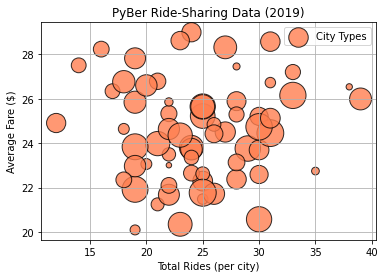

In [14]:
plt.scatter(urban_ride_count,urban_avg_fare,
            s=10*urban_driver_count,c='coral',
            edgecolor='black',linewidths=1,
            alpha=0.8,label = 'City Types')
plt.title('PyBer Ride-Sharing Data (2019)')
plt.xlabel('Total Rides (per city)')
plt.ylabel('Average Fare ($)')
plt.grid(True)
plt.legend()

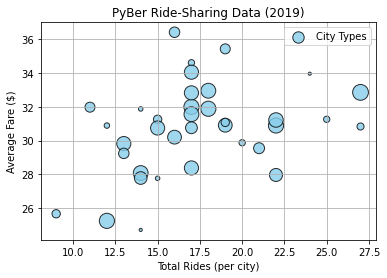

In [15]:
plt.scatter(suburban_ride_count,suburban_avg_fare,
            s=10*suburban_driver_count,c='skyblue',
            edgecolor='black',linewidths=1,
            alpha=0.8,label = 'City Types')
plt.title('PyBer Ride-Sharing Data (2019)')
plt.xlabel('Total Rides (per city)')
plt.ylabel('Average Fare ($)')
plt.grid(True)
plt.legend()

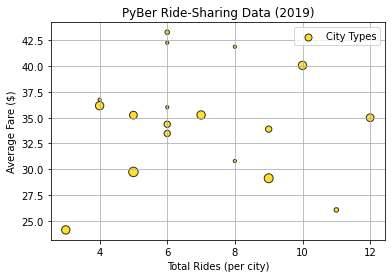

In [16]:
plt.scatter(rural_ride_count,rural_avg_fare,
            s=10*rural_driver_count,c='gold',
            edgecolor='black',linewidths=1,
            alpha=0.8,label = 'City Types')
plt.title('PyBer Ride-Sharing Data (2019)')
plt.xlabel('Total Rides (per city)')
plt.ylabel('Average Fare ($)')
plt.grid(True)
plt.legend()

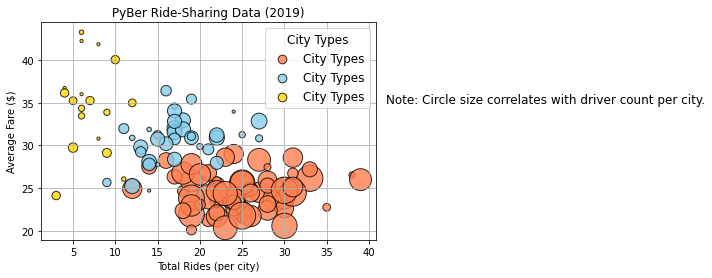

FileNotFoundError: [Errno 2] No such file or directory: 'analysis/Fig1.png'

<Figure size 432x288 with 0 Axes>

In [19]:
plt.scatter(urban_ride_count,urban_avg_fare,
            s=10*urban_driver_count,c='coral',
            edgecolor='black',linewidths=1,
            alpha=0.8,label = 'City Types')

plt.scatter(suburban_ride_count,suburban_avg_fare,
            s=10*suburban_driver_count,c='skyblue',
            edgecolor='black',linewidths=1,
            alpha=0.8,label = 'City Types')

plt.scatter(rural_ride_count,rural_avg_fare,
            s=10*rural_driver_count,c='gold',
            edgecolor='black',linewidths=1,
            alpha=0.8,label = 'City Types')

plt.title('PyBer Ride-Sharing Data (2019)')
plt.xlabel('Total Rides (per city)')
plt.ylabel('Average Fare ($)')
plt.grid(True)
lgnd = plt.legend(fontsize='12',mode='Expanded',
                 scatterpoints=1,loc='best',title='City Types')
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")
plt.show()

plt.savefig("analysis/Fig1.png")

In [18]:
plt.savefig("analysis/Fig1.png")

FileNotFoundError: [Errno 2] No such file or directory: 'analysis/Fig1.png'

<Figure size 432x288 with 0 Axes>